# Punto 3  Considere la base de datos de su interés que reportó en el Taller 2.
La red de colaboración Arxiv GR-QC se origina en la plataforma arXiv y se centra en la colaboración científica dentro de la categoría de Relatividad General y Cosmología Cuántica. Cada autor que coescribe un artículo con otro autor forma una conexión en el grafo, representada por una arista no dirigida de un autor a otro. Si un artículo tiene k autores, esto crea un subgrafo completamente conectado de k nodos.

Los datos cubren documentos publicados entre enero de 1993 y abril de 2003, lo que representa 124 meses desde los primeros meses de la existencia del arXiv. Esta colección de datos abarca prácticamente toda la historia de la sección GR-QC de arXiv durante ese período.

descripcion de la base de datos:

In [1]:
import gzip

ruta_archivo_gz = '../input/ca-GrQc.txt.gz'

# Descomprimir el archivo .gz y leerlo como un archivo de texto
with gzip.open(ruta_archivo_gz, 'rt', encoding='utf-8') as archivo:
    contenido = archivo.read()

# Ahora 'contenido' contiene el texto del archivo .gz
datos = contenido.split('\n')[4:]


In [2]:
datos_final = [(int(x.split('\t')[0]), int(x.split('\t')[1])) for x in datos if x.strip() and x.split('\t')[0]!=x.split('\t')[1]]

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
# definimos el grafo
G = nx.Graph()
# agregamos las aristas
G.add_edges_from(datos_final)

In [5]:
# obtenemos el número de nodos y aristas
nodos = G.number_of_nodes()
aristas = G.number_of_edges()
print(f'Número de nodos: {nodos}', f'Número de aristas: {aristas}', sep='\n')

Número de nodos: 5241
Número de aristas: 14484


1. Caracterizar la centralidad de los nodos.



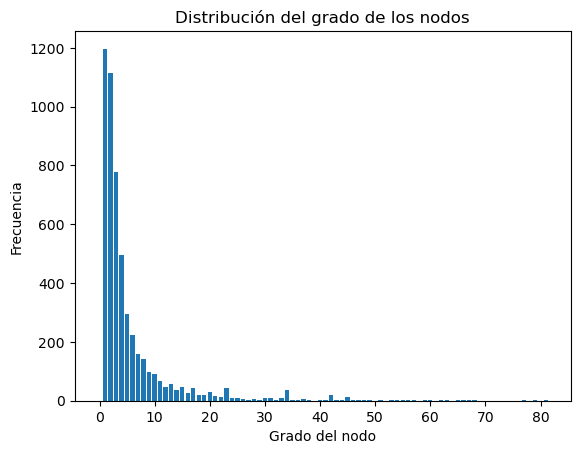

In [6]:
# grado
degree_distribution = nx.degree_histogram(G)

# Grafica la distribución del grado de los nodos
plt.bar(range(len(degree_distribution)), degree_distribution, align='center')
plt.title("Distribución del grado de los nodos")
plt.xlabel("Grado del nodo")
plt.ylabel("Frecuencia")
plt.show()

En el anterior grafico podemos observar que un gran porcentaje de los nodos tienen un grado bajo, y a medida que sube el grado el numero va disminuyendo bastante además por la descripción de la base de datos esto nos indican que bastantes pocos documentos tienen un numero alto de colaboradores 

In [7]:
# caraterizar la centralidad de los nodos
# closeness centrality (centralidad de cercanía)
closeness_centrality = nx.closeness_centrality(G)
# betweenness centrality (centralidad de intermediación)
betweenness_centrality = nx.betweenness_centrality(G)
# eigenvector centrality (centralidad de vector propio)
eigenvector_centrality = nx.eigenvector_centrality(G)

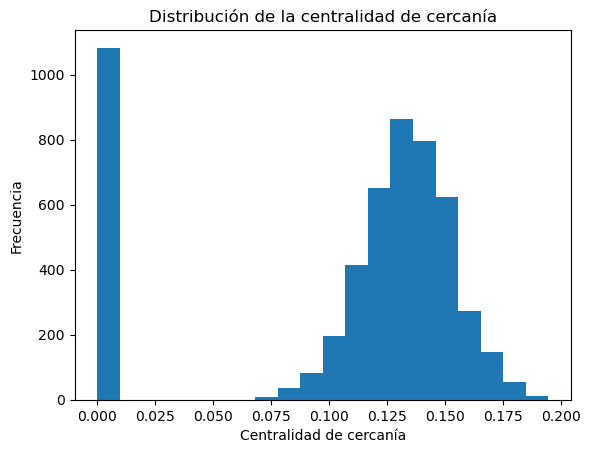

In [8]:
# Grafica la distribución de la centralidad de cercanía
plt.hist(closeness_centrality.values(), bins=20)
plt.title("Distribución de la centralidad de cercanía")
plt.xlabel("Centralidad de cercanía")
plt.ylabel("Frecuencia")
plt.show()


la centralidad de los datos por cercanía, tiene dos cosas puntuales a observar, los datos en la izquierda indican que hay pocos escritores que tienen poca cercanía a otros nodos, por lo cual estamos hablando de muchos de los clanes están separados de la centralidad dado a que el grafo no es conexo 

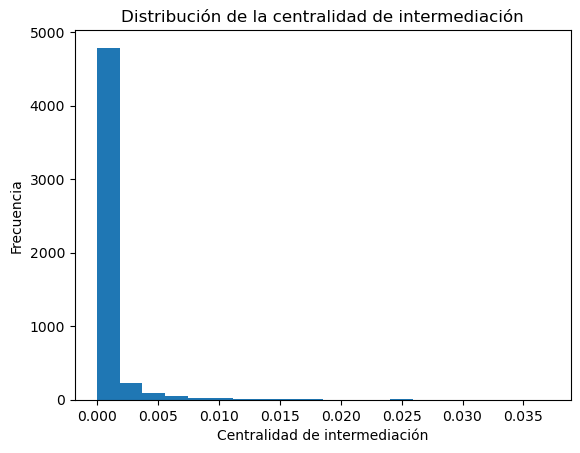

In [9]:
# Grafica la distribución de la centralidad de intermediación
plt.hist(betweenness_centrality.values(), bins=20)
plt.title("Distribución de la centralidad de intermediación")
plt.xlabel("Centralidad de intermediación")
plt.ylabel("Frecuencia")
plt.show()


para el caso de la centralidad de intermediación pasa lo mismo ya que muchos nodos tiene un grado bastante bajo además de estar separados en grupos bastante pequeños 

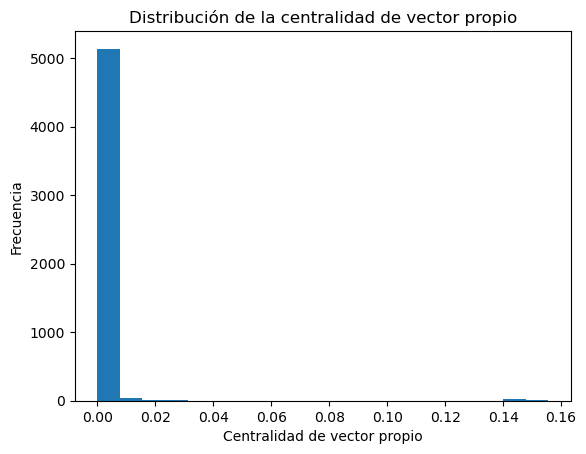

In [10]:
# Grafica la distribución de la centralidad de vector propio
plt.hist(eigenvector_centrality.values(), bins=20)
plt.title("Distribución de la centralidad de vector propio")
plt.xlabel("Centralidad de vector propio")
plt.ylabel("Frecuencia")
plt.show()


la centralidad propia nos indica que tan importante es un nodo dado que se rodea de otros nodos importantes como podemos ver esta agrupada al lado de cero dado que todos los nodos o no tienen nadie importante cerda de ellos o se relacionan con pocos nodos, en el contexto del problema veremos que los colaboradores son pocos entre si con lo cual los documentos tienen pocos autores además de es poco usual que escriban más documentos entre ellos

2. Visualizar la red con un diseño adecuado teniendo en cuenta la centralidad de los nodos.


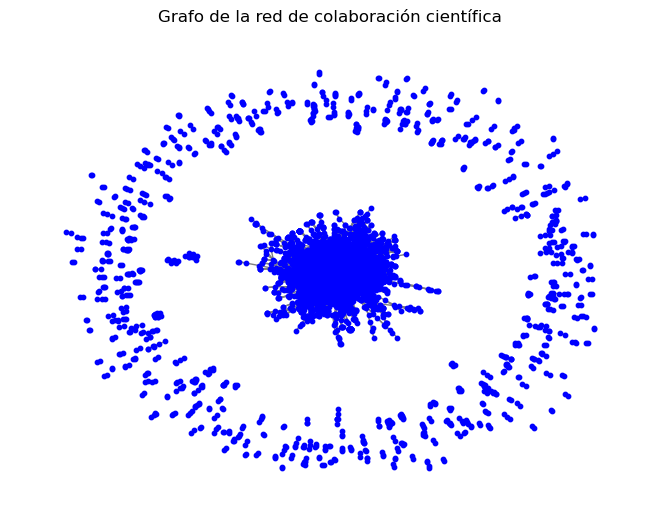

In [49]:
nx.draw_spring(G, node_size=10, node_color='blue', edge_color='gray')
#titulo
plt.title("Grafo de la red de colaboración científica")
plt.show()

cómo nos indicaba la centralidad del grafo muchos de los datos están separados de un grupo principal con lo cual muchas de las interacciones de los actores son pocas con lo cual encontraremos los artículos más importantes

3. Identificar los puntos de articulación, los puntos aislados y las componentes.


In [48]:
# puntos aisaldos
isolated = list(nx.isolates(G))
print(f'Nodos aislados: {isolated}')

Nodos aislados: []


vemos que ningun actor a publicado articulos en solitario 

In [52]:
# puntos de articulación
articulation_points = list(nx.articulation_points(G))
print(f'Número de puntos de articulación: {len(articulation_points)}')

Número de puntos de articulación: 813


dada la gran cantidad de datos parejas y triplas desconectadas de los dato tenemos muchos puntos de articulación ya que sin ellos se quedaron sin pareja para ser componentes

In [53]:
# componentes conectados
connected_components = list(nx.connected_components(G))
print(f'Número de componentes conectados: {len(connected_components)}')

Número de componentes conectados: 354


y para finalizar el número de componentes es bastante alto gracias a las parejas que han publicado artículos juntos

4. Hacer la distribución de las distancia geodésica.

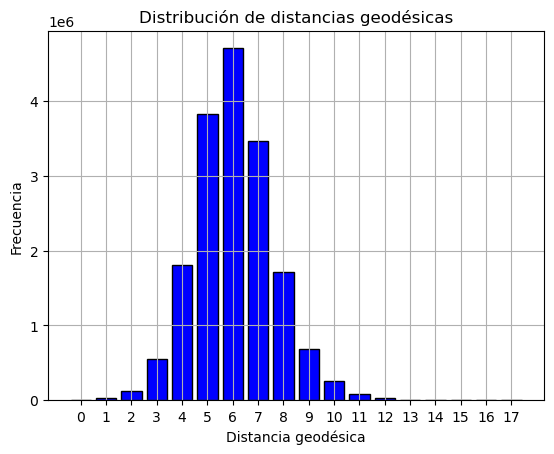

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Calcular todas las distancias geodésicas
distancias_geodesicas = []
for nodo, distancias in nx.all_pairs_shortest_path_length(G):
    distancias_geodesicas.extend(distancias.values())

# Contar la frecuencia de cada distancia geodésica
frecuencias = {}
for distancia in distancias_geodesicas:
    if distancia in frecuencias:
        frecuencias[distancia] += 1
    else:
        frecuencias[distancia] = 1

# Crear el gráfico de barras
plt.bar(frecuencias.keys(), frecuencias.values(), color='blue', edgecolor='black')
plt.title('Distribución de distancias geodésicas')
plt.xlabel('Distancia geodésica')
plt.ylabel('Frecuencia')
plt.grid(True)

# Agregar etiquetas a los ejes x
plt.xticks(list(frecuencias.keys()), list(frecuencias.keys()))

plt.show()


la distancia geodésica tienden a agruparse en el centro por lo cual podemos deducir que la conectividad dentro del grupo central es muy alta 

5. Determinar si la red es libre de escala.


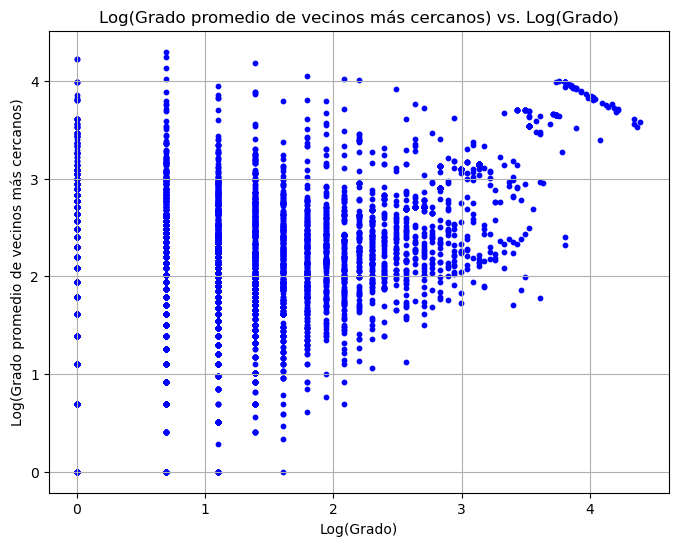

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calcular el grado de los nodos
degrees = dict(G.degree())

# Calcular el grado promedio de los vecinos más cercanos para cada nodo
avg_neighbor_degrees = {}
for node in G.nodes():
    neighbors = G.neighbors(node)
    avg_neighbor_deg = np.mean([degrees[n] for n in neighbors])
    avg_neighbor_degrees[node] = avg_neighbor_deg

# Obtener los grados y grados promedio de los vecinos más cercanos
degrees_values = np.array(list(degrees.values()))
avg_neighbor_degrees_values = np.array(list(avg_neighbor_degrees.values()))

# Graficar el logaritmo del grado promedio de los vecinos más cercanos frente al logaritmo del grado
plt.figure(figsize=(8, 6))
plt.scatter(np.log(degrees_values), np.log(avg_neighbor_degrees_values), color='b', s=10)
plt.title("Log(Grado promedio de vecinos más cercanos) vs. Log(Grado)")
plt.xlabel("Log(Grado)")
plt.ylabel("Log(Grado promedio de vecinos más cercanos)")
plt.grid(True)
plt.show()

este grafico nos muestra a medida que el grado aumenta los nodos vecinos tienen a relacionarse con nodos de grado similar indicando la existencia de pocas componentes grandes o muy similares a la gigante 

6. Hacer un censo de los clanes y calcular el número clan.


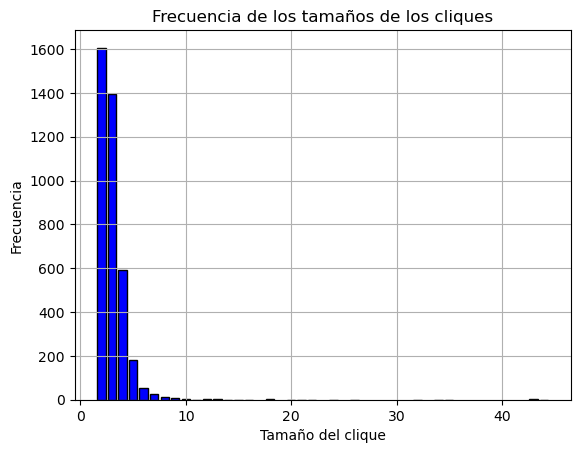

In [26]:
# censo de cliques
# Inicializar el diccionario para contar la frecuencia de los tamaños de los cliques
clique_freq = {}

# Calcular la frecuencia de los cliques
for clique in nx.find_cliques(G):
    size = len(clique)
    if size in clique_freq:
        clique_freq[size] += 1
    else:
        clique_freq[size] = 1

# Graficar la frecuencia de los tamaños de los cliques
plt.bar(clique_freq.keys(), clique_freq.values(), color='blue', edgecolor='black')
plt.title('Frecuencia de los tamaños de los cliques')
plt.xlabel('Tamaño del clique')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

como vemos la gran cantidad de los cliques es tienen tamaño dos como se pudo observar en la gráfica pero hay valores demasiado atípicos los cuales pueden estar asociados a la componente gigante del conjunto, lo cual implica que hay al menos un documento el cual tiene más de 40 escritores

otra cosa que nos podría decir sobre la asortividad es que podría ser alta ya que los nodos se relacionan con nodos que tienen si mismo grado, dado por la misma estructura de la red
  

7. Calcular la densidad junto con el coeficiente de agrupamiento de la red.


In [32]:
#Calcular la densidad junto con el coeficiente de agrupamiento de la red.
# densidad
densidad = nx.density(G)
# coeficiente de agrupamiento
# transitividad lolcal
transitividad_local = nx.transitivity(G)
# 
print(f'Densidad: {densidad}', f'Coeficiente de agrupamiento: {transitividad_local}', sep='\n')


Densidad: 0.0010548071503165733
Coeficiente de agrupamiento: 0.6298424741263426


la densidad de la red es muy baja que es realmente usual dentro de las redes, y más sobre la conexión de las personas donde que muchos de los individuos no han trabajado con la centralidad de los datos y tenemos cliques desconectados

por otro lado, el coeficiente de agrupamiento suele ser alto ya que, por la característica de la base de datos, todos los escritores de un artículo forman un clique, entonces la transitividad de los nodos es muy alta 


8. Particionar la red usando tres métodos de agrupamiento de su elección. Visualizar los resultados obtenidos.

9. Hacer un análisis de asortatividad de la red.


In [39]:
# Calcular la asortividad de grado
asortatividad = nx.degree_assortativity_coefficient(G)
print(f'Asortatividad de grado: {asortatividad}')

Asortatividad de grado: 0.659324624299397


primero veremos bajo que propiedad del nodo vamos a realizar la asortividad, dado que este grafo es simple no tiene fuerza de la conexión nos basaremos en el grado únicamente. La asortividad es bastante alta como vimos en el ítem de la libertad de escala, los nodos tienden a agruparse con los nodos de grados similares viendo desde los cliques de tamaño 2 y tres hasta los que tienen tamaño mayor a 40, esto indica que los escritores entre más populares podrían serlo solo por trabajar en un texto masivo o importante por lo cual creo que se debería llevar a cabo una red bipartita que asocie estos a trabajos fuera del clique de mayor tamaño

10. Interpretar los resultados.

1. **Distribución de grados**: Se observa que la mayoría de los nodos tienen un grado bajo, lo que sugiere que la mayoría de los documentos tienen pocos colaboradores. A medida que aumenta el grado, el número de nodos disminuye considerablemente.

2. **Centralidad por cercanía**: Indica que muchos escritores tienen poca cercanía con otros nodos, lo que sugiere la existencia de varios grupos separados en el grafo debido a su falta de conexiones, lo que implica que el grafo no es conexo.

3. **Centralidad de intermediación**: Similar a la centralidad por cercanía, indica que muchos nodos tienen un grado bajo y están separados en grupos pequeños, lo que sugiere una baja conectividad entre los nodos.

4. **Centralidad propia**: Muestra la importancia de un nodo basándose en su conexión con otros nodos importantes. Los nodos tienden a agruparse alrededor de cero, lo que indica que la mayoría de los nodos tienen poca importancia en el contexto del problema.

5. **Puntos de articulación**: Se observa una gran cantidad de puntos de articulación debido a la presencia de parejas y tríos desconectados en los datos.

6. **Número de componentes**: Es alto debido a las parejas que han publicado artículos juntos, lo que indica una diversidad en las colaboraciones.

7. **Densidad de la red**: Es baja, lo cual es común en redes sociales, lo que implica que muchos individuos no han trabajado con otros y que hay cliques desconectados.

8. **Coeficiente de agrupamiento**: Es alto debido a que todos los escritores de un artículo forman un clique, lo que sugiere una alta transitividad entre los nodos.

9. **Asortatividad**: Es alta, ya que los nodos tienden a agruparse con otros nodos de grado similar, lo que implica que los escritores más populares podrían serlo solo por trabajar en trabajos masivos o importantes. Se sugiere la creación de una red bipartita para asociar trabajos fuera del clique de mayor tamaño.
